<a href="https://colab.research.google.com/github/micha-blip/Bird-images-unsupervised-clustering/blob/main/Text_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
comp = pd.read_excel('/Untitled spreadsheet (1).xlsx')

In [10]:
comp.DESCRIPTION

,DESCRIPTION
0,3B Pharmaceuticals GmbH (3BP) is a German biot...
1,With the 7Mind app you will learn to meditate ...
2,We are a global medical technology company bas...
3,ABiTEP is a long-standing specialist in the pr...
4,Supporting better health outcomes and clinical...
...,...
128,Catenion is a management consulting firm devot...
129,"We’re a licensed bank, 100% digital and secure..."
130,"Modern online banking, a branch around the cor..."
131,Berliner Volksbank is a cooperative bank and i...


In [11]:
text = list(comp.DESCRIPTION)

In [12]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

# Sample list of short sentences
sentences = text

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate embeddings for the sentences
embeddings = model.encode(sentences)



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
embeddings.shape

(133, 768)

In [14]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 133 samples in 0.001s...
[t-SNE] Computed neighbors for 133 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 133 / 133
[t-SNE] Mean sigma: 0.138559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.902893
[t-SNE] KL divergence after 5350 iterations: 0.820971


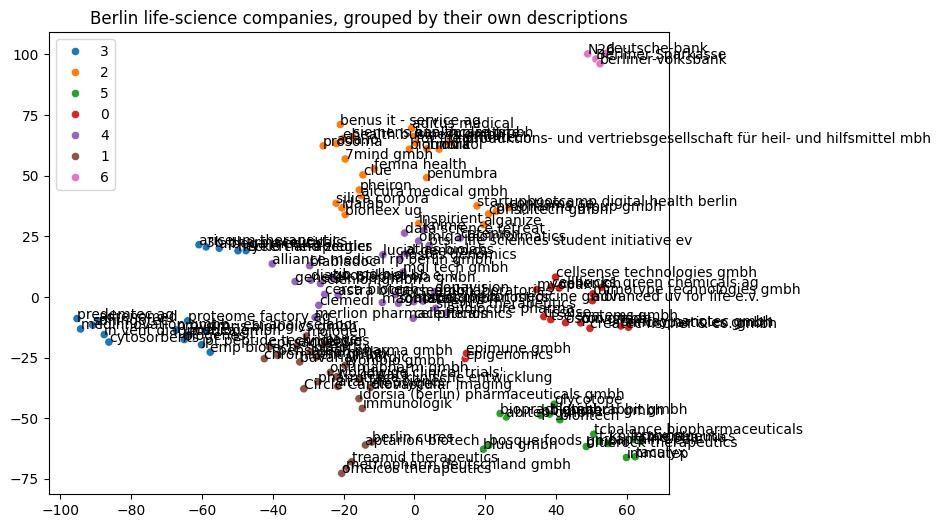

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity = 3,  metric="cosine",  max_iter=6000, verbose=1)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(embeddings)

clustering = KMeans(n_clusters=7).fit(X_tsne)
# Plot the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = [str(x) for x in clustering.labels_])


for i,name in enumerate(list(comp.NAME)):
    plt.annotate(text=str(name), xy= (X_tsne[i, 0], X_tsne[i, 1]))

plt.title("Berlin life-science companies, grouped by their own descriptions")
plt.show()


In [16]:
a = sns.color_palette().as_hex()
colors_kmeans = []

for i in range(len(clustering.labels_)):
    colors_kmeans.append(a[clustering.labels_[i]])

In [21]:
import plotly.graph_objects as go
import numpy as np

annotations_list = comp.NAME

# Initialize the figure widget with hover text
f = go.FigureWidget([go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    marker=dict(size=20, color = colors_kmeans),
    text=annotations_list,  # Adding metadata for hover text
    hoverinfo='text',       # Display text on hover

)])

f.update_layout(
    width=700,   # Set the desired width
    height=700)

scatter = f.data[0]
colors = colors_kmeans
scatter.marker.color = colors_kmeans
scatter.marker.size = [20] * len(embeddings)
f.layout.hovermode = 'closest'


# Display the interactive plot
f.show()
f.write_html("companies.html")